In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('cardtransdata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  int64  
 4   used_chip                       10000 non-null  int64  
 5   used_pin_number                 10000 non-null  int64  
 6   online_order                    10000 non-null  int64  
 7   fraud                           10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1,0,0,1,0
9996,3.614858,0.431593,0.061778,1,0,0,1,0
9997,10.131863,10.262508,2.818090,1,0,0,1,0
9998,16.306236,0.014054,1.904495,1,0,0,1,0
9999,58.108125,0.318110,0.386920,1,1,0,1,0


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.380426,4.807097,1.824070,0.879100,0.350800,0.104800,0.641500,0.084100
std,58.811427,22.260126,2.762471,0.326027,0.477244,0.306311,0.479584,0.277552
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.810520,0.305219,0.488918,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.029796,1.006459,1.005300,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.875383,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       distance_from_home  distance_from_last_transaction  \
0                  False                           False   
1                  False                           False   
2                  False                           False   
3                  False                           False   
4                  False                           False   
...                  ...                             ...   
9995               False                           False   
9996               False                           False   
9997               False                           False   
9998               False                           False   
9999               False                           False   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                              False            False      False   
1                              False            False      False   
2            

In [ ]:
df.shape

(10000, 8)

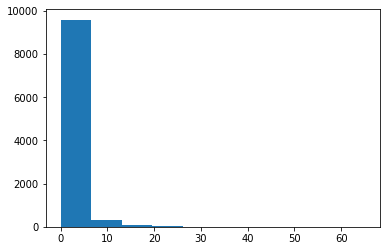

In [ ]:
X=df.ratio_to_median_purchase_price
plt.hist(X)
plt.show()

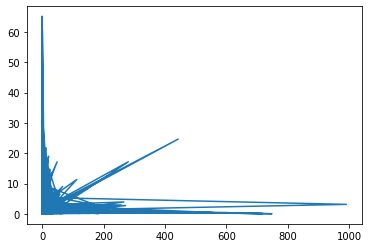

In [ ]:
X=df.distance_from_last_transaction
Y=df.ratio_to_median_purchase_price
plt.plot(X,Y)

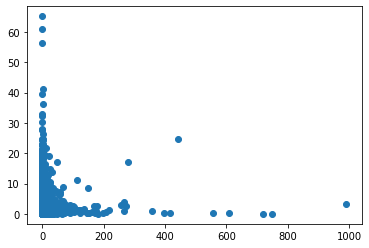

In [ ]:
X=df.distance_from_last_transaction
Y=df.ratio_to_median_purchase_price
plt.scatter(X,Y)

<BarContainer object of 10000 artists>

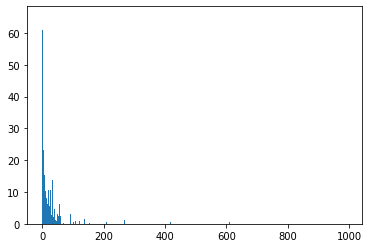

In [ ]:
X=df.distance_from_last_transaction
Y=df.ratio_to_median_purchase_price
plt.bar(X,Y)   

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

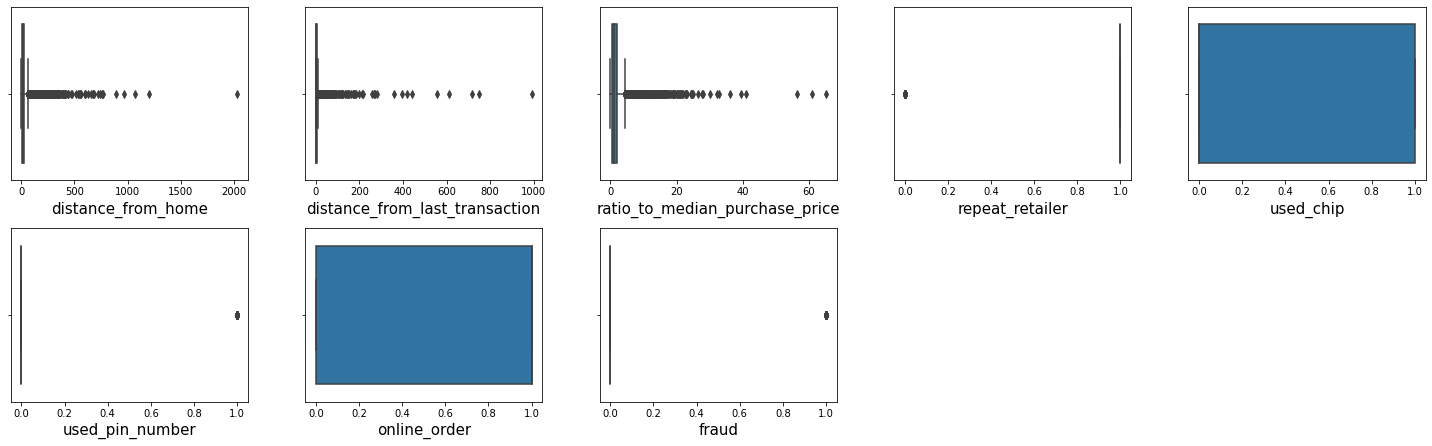

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df.columns:
  if plotnumber <=9:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('fraud', axis=1)
Y = df['fraud']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

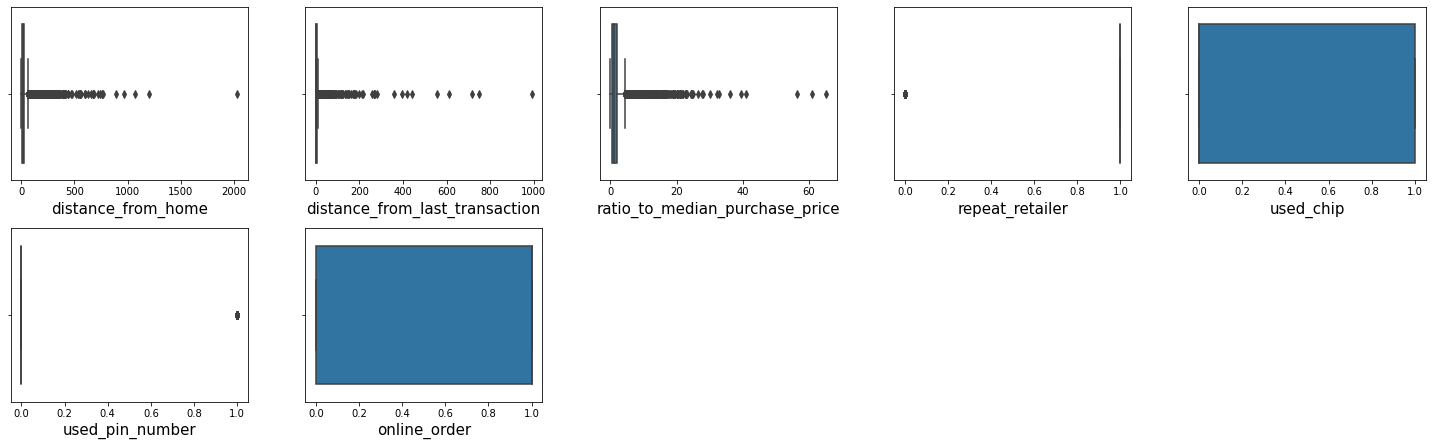

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df.columns:
  if plotnumber <=7:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
import missingno as msno

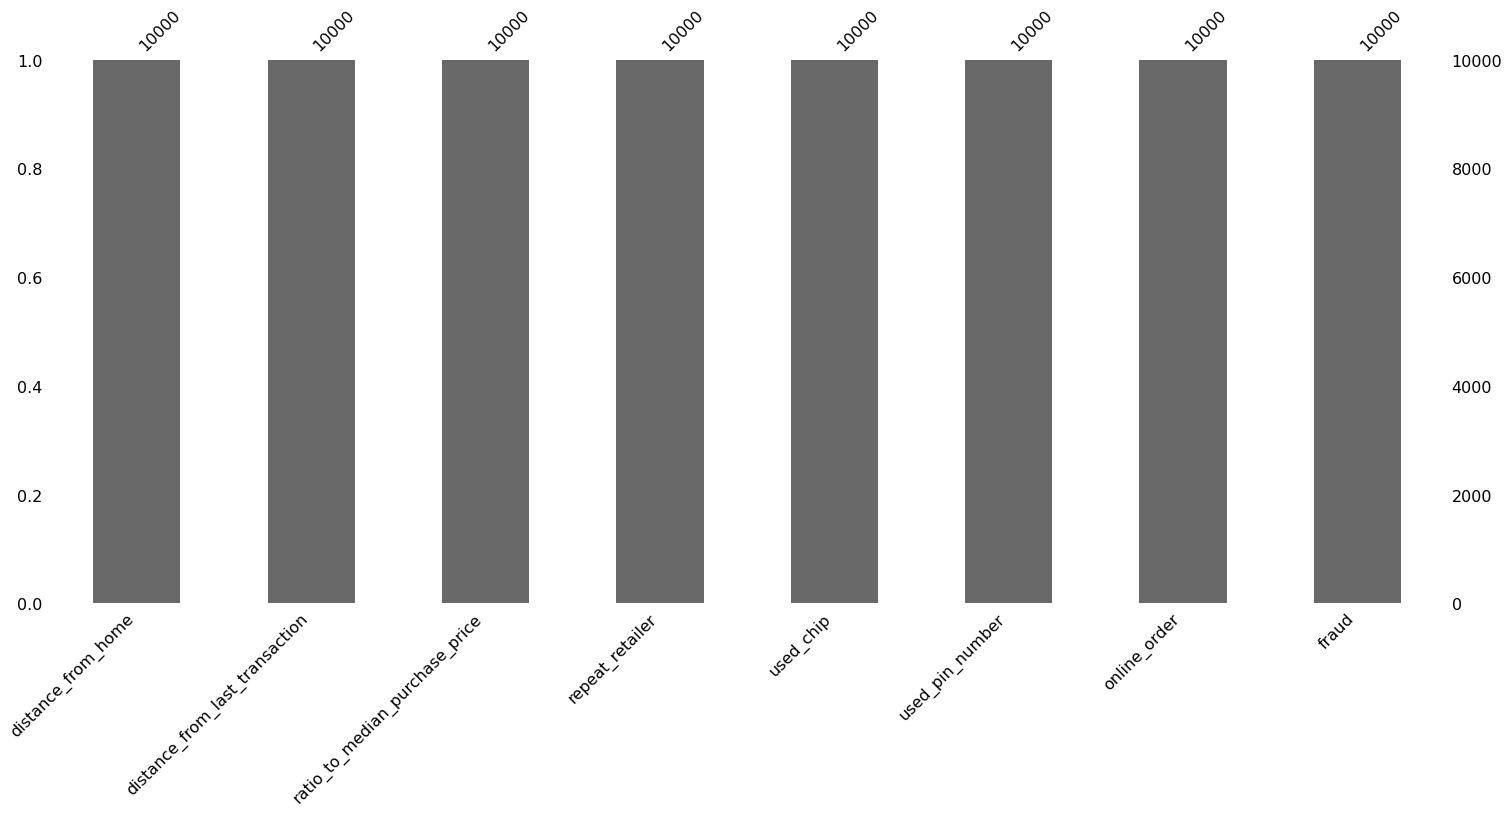

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.6, random_state = 0)

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred =clf.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[5483,    3],
       [  12,  502]])

In [ ]:
from sklearn.metrics import accuracy_score
b=accuracy_score(Y_test,Y_pred)
b

0.9975

In [ ]:
X_train, X_tesst, Y_train, Y_test=train_test_split(X,Y,test_size = 0.5, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(X_train,Y_train)

GaussianNB()

In [ ]:
X = df.drop('fraud', axis=1)
Y = df['fraud']

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
Y_pred =clf1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[4559,    0],
       [ 441,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(Y_test,Y_pred)
a

0.9118